# An Introduction to Networks with Python

Malayaja Chutani<br>
PhD Student, Dept of Physics<br>
IIT Madras, India

Networks in the wild:

- network of friends on Facebook

- network of professional contacts on LinkedIn

- communication networks: phones, emails.

- networks of roadways or flight routes

- network of neurons in our brain

### So what? Why should I care?

- studying network structure can give us insight about the overall system.

- we can understand something happening on a network based on this information.

"A network is a set of items, which we will call vertices or sometimes nodes, with connections between them, called edges." Newman, SIAM Review (2003).

Represented by a graph, $G(V, E)$<br>
$V$ is a set of nodes.<br>
$E \subseteq V \times V$ is a set of edges.<br>
Nodes represent components of the system, and edges represent interactions or relations between the components.

<img src="example_network.png">

### How do I create, manipulate, and study the structure, dynamics, and functions of complex networks?

I use NetworkX.

Other tools:
- graph-tool
- igraph
- gephi

Some types of networks (or graphs):
- undirected -- facebook friends
- directed -- twitter followers, who lends money to whom
- bipartite network -- actors and movies
- multiplex or multi-layer network -- transport network: one layer represents roadways, one layer represents railways, one layer represents flight routes.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import collections
import pandas as pd

In [2]:
G = nx.Graph()
# G = nx.DiGraph()
# G = nx.MultiGraph()
# G = nx.MultiDiGraph()

In [3]:
type(G)

networkx.classes.graph.Graph

In [4]:
node_list = [0, 1, 2, 3, 4, 5]
G.add_nodes_from(node_list)

In [5]:
edge_list = [(0, 3), (1, 2), (1, 3), (3, 4), (3, 5), (4, 5)]
G.add_edges_from(edge_list)

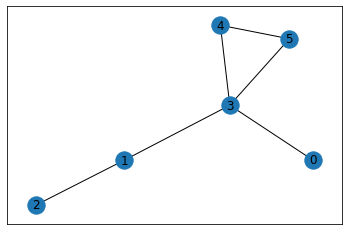

In [6]:
nx.draw_networkx(G, with_labels=True)

In [7]:
# Add nodes and edges with attributes:

G2 = nx.Graph()

node_list_2 = [(0, {"mass": 10}),
               (1, {"mass": 7}),
               (2, {"mass": 2}),
               (3, {"mass": 0}),
               ("hello", {"mass": 15})]
G2.add_nodes_from(node_list_2)

edge_list_2 = [(0, 1, 1.0), (0, 2, 1.5), (0, 3, 1.1), 
               (2, "hello", 2.0)]
G2.add_weighted_edges_from(edge_list_2)

In [8]:
G2.nodes(data=True)

NodeDataView({0: {'mass': 10}, 1: {'mass': 7}, 2: {'mass': 2}, 3: {'mass': 0}, 'hello': {'mass': 15}})

In [9]:
G2.edges(data=True)

EdgeDataView([(0, 1, {'weight': 1.0}), (0, 2, {'weight': 1.5}), (0, 3, {'weight': 1.1}), (2, 'hello', {'weight': 2.0})])

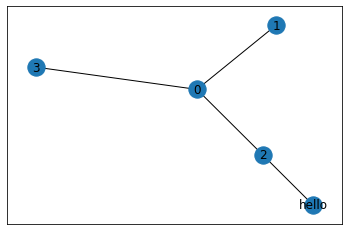

In [10]:
nx.draw_networkx(G2, with_labels=True)

In [11]:
G3 = nx.Graph()

edge_list_3 = [(0, 1), (0, 2), (0, 3),
              (1, 2), (1, 3), (1, 4),
              (2, 3), (2, 6),
              (3, 4),
              (5, 6), (5, 'spam'),
              (6, 'spam')]

G3.add_edges_from(edge_list_3)

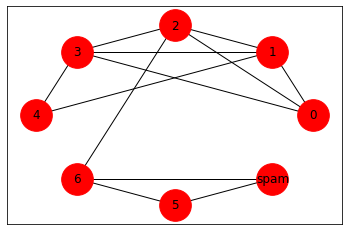

In [12]:
nx.draw_networkx(G3, with_labels=True, pos=nx.circular_layout(G3),
                 node_size=1000, node_color="red")

In [13]:
# Avg shortest path length:
# Average distance between any pair of nodes.
nx.average_shortest_path_length(G3)

1.9642857142857142

In [14]:
# Avg clustering coeff:
# Quantifies the tendency to cluster in a network
nx.average_clustering(G3)

0.7708333333333333

In [15]:
# Degree Distribution:
# degree distribution, p(k) of a network gives the fraction of nodes with degree k.
# In other words, it gives the probability distribution of degrees over the full network.

degree_sequence = sorted([deg for node, deg in G3.degree()], reverse=True)
degree_count = collections.Counter(degree_sequence)

count_dict = {}

k_max = max(degree_sequence)
for k in range(0, k_max+1): count_dict[k] = 0 #initialize all to zero
for k, cnt in degree_count.items(): count_dict[k] = cnt

k_list = list(count_dict.keys()) #list of degrees
cnt_list = list(count_dict.values()) #list of counts
pk_list = np.array(cnt_list)/sum(count_dict.values()) #normalized count

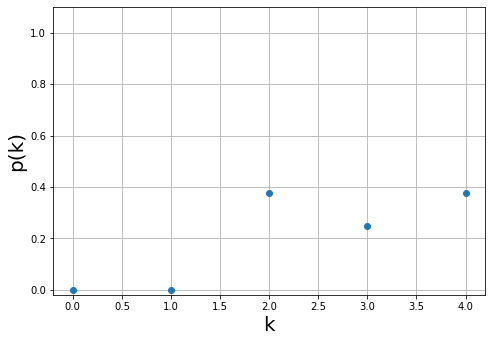

In [16]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(k_list, pk_list, "C0o")

ax.set_xlabel("k", fontsize=20)
ax.set_ylabel("p(k)", fontsize=20)
ax.set_ylim(top=1.1)
ax.grid()

plt.show()

### Let's play some Game of Thrones

In [17]:
# https://www.kaggle.com/mmmarchetti/game-of-thrones-network-analysis/data
got_book1_df = pd.read_csv("got_book1.csv")

In [18]:
got_book1_df.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [19]:
got_edge_list = got_book1_df[["Source", "Target"]].values

In [20]:
G_got_book1 = nx.Graph()
G_got_book1.add_edges_from(got_edge_list)

In [21]:
G_got_book1.number_of_nodes(), G_got_book1.number_of_edges()

(187, 684)

In [22]:
nx.average_shortest_path_length(G_got_book1)

2.9124259674544306

In [23]:
nx.average_clustering(G_got_book1)

0.5121189412047715

In [24]:
got_deg_seq = [deg for node, deg in G_got_book1.degree()]

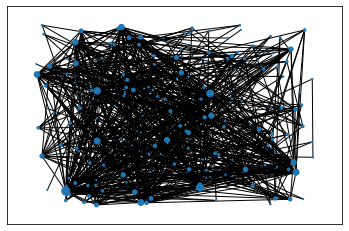

In [25]:
got_node_pos = nx.random_layout(G_got_book1)

nx.draw_networkx(G_got_book1, with_labels=False,
                 pos=got_node_pos,
                 node_size = np.array(got_deg_seq))

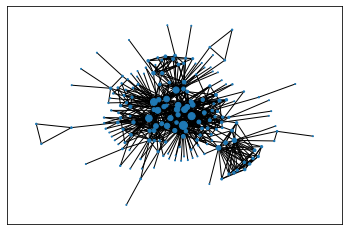

In [26]:
got_node_pos = nx.kamada_kawai_layout(G_got_book1, scale=1000)

nx.draw_networkx(G_got_book1, with_labels=False,
                 pos=got_node_pos,
                 node_size = np.array(got_deg_seq))

In [27]:
degree_sequence = sorted([deg for node, deg in G_got_book1.degree()], reverse=True)
degree_count = collections.Counter(degree_sequence)

count_dict = {}

k_max = max(degree_sequence)
for k in range(0, k_max+1): count_dict[k] = 0 #initialize all to zero
for k, cnt in degree_count.items(): count_dict[k] = cnt

k_list = list(count_dict.keys()) #list of degrees
cnt_list = list(count_dict.values()) #list of counts
pk_list = np.array(cnt_list)/sum(count_dict.values()) #normalized count

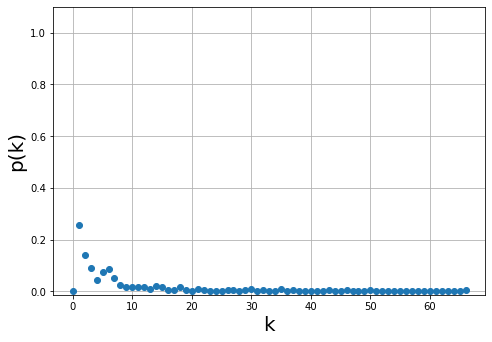

In [28]:
# Degree Distribution:

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(k_list, pk_list, "C0o")

ax.set_xlabel("k", fontsize=20)
ax.set_ylabel("p(k)", fontsize=20)

ax.set_ylim(top=1.1)
ax.grid()

plt.show()

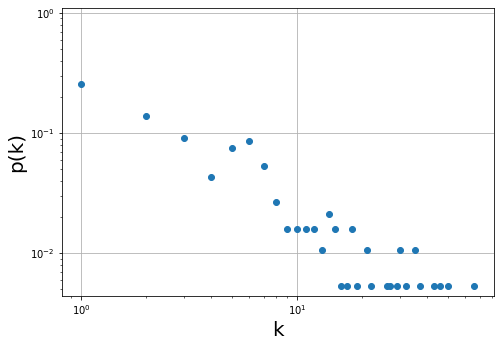

In [29]:
# Degree Distribution:

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(k_list, pk_list, "C0o")

ax.set_xlabel("k", fontsize=20)
ax.set_ylabel("p(k)", fontsize=20)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(top=1.1)
ax.grid()

plt.show()

- Edge list
- Adjacency list
- Adjacency matrix

Edge list

```
1 2 #source target
```

```
1 2 {'weight':7, 'color':'green'}
```

```
G = nx.read_edgelist("filename.edgelist")
nx.write_edgelist(G, "filename.edgelist")
```

Adjacency list

```
a b c #source target target
d e
f
```

```
G = nx.read_adjlist("filename.adjlist")
nx.write_adjlist(G, "filename.adjlist")
```

Adjacency matrix:

In [30]:
A = np.array(
    [
        [0, 1, 1, 0, 0],
        [1, 0, 1, 0, 0],
        [1, 1, 0, 1, 1],
        [0, 0, 1, 0, 1],
        [0, 0, 1, 1, 0],
    ]
)

In [31]:
G4 = nx.from_numpy_array(A)

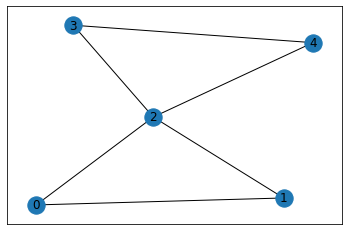

In [32]:
nx.draw_networkx(G4, with_labels=True)